<a href="https://colab.research.google.com/github/afraa-n/XAI-Interpretable-ML-imodels/blob/main/XAI_model_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Interpretable ML imodels

In this notebook, we explore the application of interpretable machine learning models to a classification problem, focusing on models from the imodels library. The imodels library is known for its transparent and interpretable algorithms, allowing for easy understanding of how predictions are made. In particular, we will assess the performance of Skope Rules Classifier, Optimal Rule List Classifier and Boosted Rules Classifier.

## 1. Loading the Dataset

Feature Matrix (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target Vector (y):
[0 0 0 0 0]


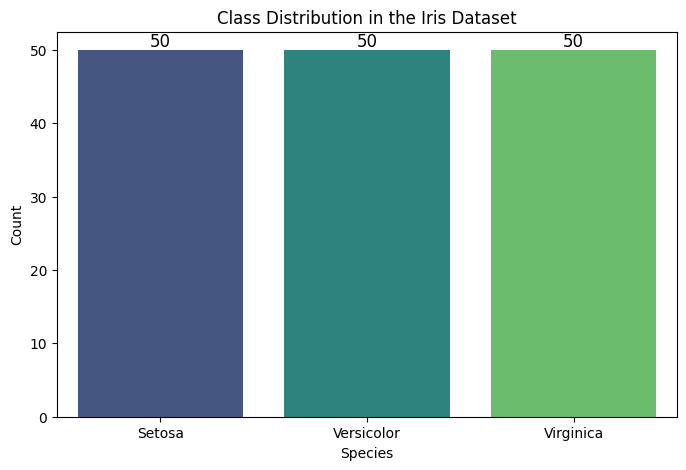

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Display the first few rows of the dataset
print("Feature Matrix (X):")
print(X.head())
print("\nTarget Vector (y):")
print(y[:5])

# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=pd.DataFrame({'Species': y}), x='Species', palette='viridis')
plt.title('Class Distribution in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.show()

In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Display the first few rows of training data
print("Training Feature Matrix (X_train):")
print(X_train.head())
print("\nTraining Target Vector (y_train):")
print(y_train[:5])

Training Feature Matrix (X_train):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
122                7.7               2.8                6.7               2.0
67                 5.8               2.7                4.1               1.0
28                 5.2               3.4                1.4               0.2
40                 5.0               3.5                1.3               0.3

Training Target Vector (y_train):
[0 2 1 0 0]


In [3]:
# Function to display the confusion matrix
def plot_confusion_matrix(confusion_mat, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Setosa', 'Versicolor', 'Virginica'],
                yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



---



## 2. Skope Rules Classifier
### 2.1. Demo


Skope Rules Classifier Metrics:
Accuracy: 67.92%
Precision: 0.52
Recall: 0.68
F1 Score: 0.57


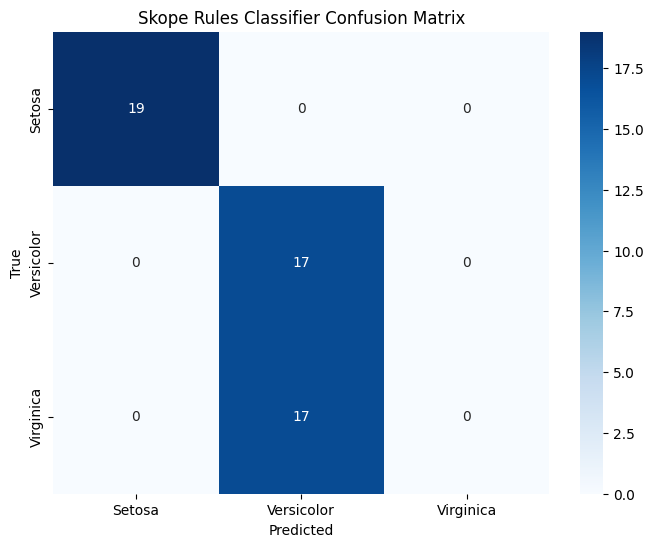

In [4]:
from imodels import SkopeRulesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Skope Rules Classifier model
skope_model = SkopeRulesClassifier()

# Train the model on the training data
skope_model.fit(X_train, y_train)

# Make predictions on the test data
skope_preds = skope_model.predict(X_test)

# Evaluate model performance
accuracy_skope = np.mean(skope_preds == y_test) * 100
precision_skope = precision_score(y_test, skope_preds, average='weighted')
recall_skope = recall_score(y_test, skope_preds, average='weighted')
f1_skope = f1_score(y_test, skope_preds, average='weighted')
confusion_skope = confusion_matrix(y_test, skope_preds)

# Print evaluation metrics
print("Skope Rules Classifier Metrics:")
print(f"Accuracy: {accuracy_skope:.2f}%")
print(f"Precision: {precision_skope:.2f}")
print(f"Recall: {recall_skope:.2f}")
print(f"F1 Score: {f1_skope:.2f}")

# Display confusion matrix
plot_confusion_matrix(confusion_skope, "Skope Rules Classifier Confusion Matrix")

The Skope Rules Classifier achieved an accuracy of 67.92% on the Iris dataset. While it was able to predict the species correctly in many cases, it had some difficulty when the species were closely related, leading to false positives. The strength of this model lies in its ability to provide simple, easy-to-understand rules, making it useful when interpretability is important. However, its moderate performance suggests that while it is good for understanding the data, it may not always be the most accurate classifier for distinguishing between species.

### 2.2. Visual & Explanation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


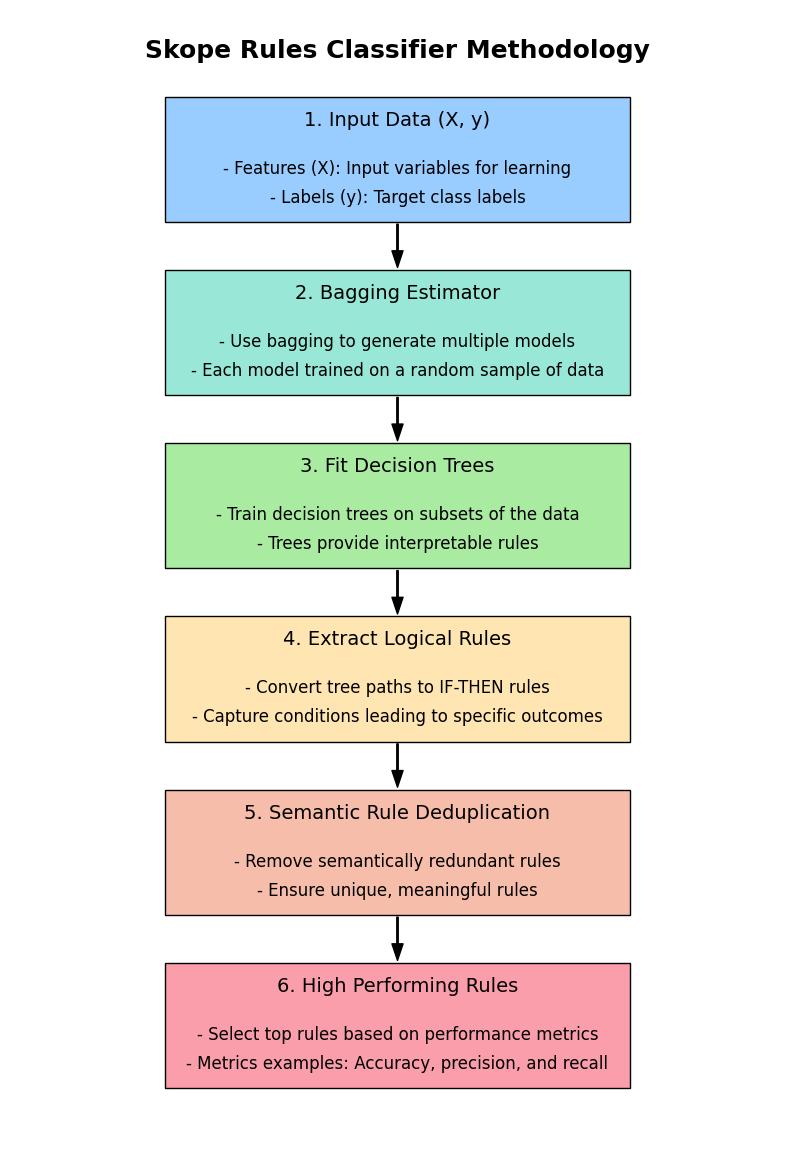

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_skope_rules_methodology():
    fig, ax = plt.subplots(figsize=(10, 15))
    ax.text(0.5, 0.95, 'Skope Rules Classifier Methodology', fontsize=18, ha='center', weight='bold')

    # Input Data Box
    ax.add_patch(patches.Rectangle((0.2, 0.78), 0.60, 0.13, edgecolor='black', facecolor='#99CCFF'))
    ax.text(0.5, 0.88, '1. Input Data (X, y)', fontsize=14, ha='center', color='black')
    ax.text(0.5, 0.83, '- Features (X): Input variables for learning', fontsize=12, ha='center')
    ax.text(0.5, 0.80, '- Labels (y): Target class labels', fontsize=12, ha='center')

    # Bagging Estimator Box
    ax.add_patch(patches.Rectangle((0.2, 0.60), 0.60, 0.13, edgecolor='black', facecolor='#99E8D7'))
    ax.text(0.5, 0.70, '2. Bagging Estimator', fontsize=14, ha='center', color='black')
    ax.text(0.5, 0.65, '- Use bagging to generate multiple models', fontsize=12, ha='center')
    ax.text(0.5, 0.62, '- Each model trained on a random sample of data', fontsize=12, ha='center')

    # Fit Decision Trees Box
    ax.add_patch(patches.Rectangle((0.2, 0.42), 0.60, 0.13, edgecolor='black', facecolor='#A8EBA1'))
    ax.text(0.5, 0.52, '3. Fit Decision Trees', fontsize=14, ha='center', color='black')
    ax.text(0.5, 0.47, '- Train decision trees on subsets of the data', fontsize=12, ha='center')
    ax.text(0.5, 0.44, '- Trees provide interpretable rules', fontsize=12, ha='center')

    # Extract Logical Rules Box
    ax.add_patch(patches.Rectangle((0.2, 0.24), 0.60, 0.13, edgecolor='black', facecolor='#FFE5B2'))
    ax.text(0.5, 0.34, '4. Extract Logical Rules', fontsize=14, ha='center', color='black')
    ax.text(0.5, 0.29, '- Convert tree paths to IF-THEN rules', fontsize=12, ha='center')
    ax.text(0.5, 0.26, '- Capture conditions leading to specific outcomes', fontsize=12, ha='center')

    # Semantic Rule Deduplication Box
    ax.add_patch(patches.Rectangle((0.2, 0.06), 0.60, 0.13, edgecolor='black', facecolor='#F6BDAA'))
    ax.text(0.5, 0.16, '5. Semantic Rule Deduplication', fontsize=14, ha='center', color='black')
    ax.text(0.5, 0.11, '- Remove semantically redundant rules', fontsize=12, ha='center')
    ax.text(0.5, 0.08, '- Ensure unique, meaningful rules', fontsize=12, ha='center')

    # High Performing Rules Box
    ax.add_patch(patches.Rectangle((0.2, -0.12), 0.60, 0.13, edgecolor='black', facecolor='#F99EAA'))
    ax.text(0.5, -0.02, '6. High Performing Rules', fontsize=14, ha='center', color='black')
    ax.text(0.5, -0.07, '- Select top rules based on performance metrics', fontsize=12, ha='center')
    ax.text(0.5, -0.10, '- Metrics examples: Accuracy, precision, and recall', fontsize=12, ha='center')

    # Arrow positions
    arrow_positions = [
        (0.5, 0.78),  # From Input Data to Bagging Estimator
        (0.5, 0.60),  # From Bagging Estimator to Fit Decision Trees
        (0.5, 0.42),  # From Fit Decision Trees to Extract Logical Rules
        (0.5, 0.24),  # From Extract Logical Rules to Semantic Rule Deduplication
        (0.5, 0.06)   # From Semantic Rule Deduplication to High Performing Rules
    ]

    # Arrow ending positions
    arrow_end_positions = [
        (0.5, 0.73),  # End position for Input Data to Bagging Estimator
        (0.5, 0.55),  # End position for Bagging Estimator to Fit Decision Trees
        (0.5, 0.37),  # End position for Fit Decision Trees to Extract Logical Rules
        (0.5, 0.19),  # End position for Extract Logical Rules to Semantic Rule Deduplication
        (0.5, 0.01)  # End position for Semantic Rule Deduplication to High Performing Rules
    ]

    for start, end in zip(arrow_positions, arrow_end_positions):
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.2, 1)
    ax.axis('off')
    plt.show()

# Visualization function call
plot_skope_rules_methodology()

### **Explanation of the Methodology**   

a. **Input Data (X, y)**: We start by gathering the Iris dataset, which includes features like the length and width of the sepal and petal of different Iris flower species (X). The target labels (y) tell us which species each flower belongs to (e.g., Setosa, Versicolor, or Virginica).

b. **Bagging Estimator**: Next, we use a bagging technique. This means we create several decision trees, each trained on a different random sample of the Iris data. By averaging the predictions from all these trees, we make the overall model more stable and accurate.

c. **Fit Decision Trees**: Each decision tree learns from its own subset of the data. For example, one tree might focus more on the petal length while another might focus on sepal width. This variety helps the model capture different patterns in the data.

d. **Extract Logical Rules**: After training the trees, the model extracts simple rules that explain how it makes predictions. For instance, a rule might say, "IF the petal length is less than 2 cm, THEN the flower is likely Setosa." These rules are straightforward, making it easy to understand the model's decisions.

e. **Semantic Rule Deduplication**: At this stage, any duplicate rules that convey the same information are removed. For example, if two rules say similar things about the same flower type, we keep just one. This keeps the rule set concise.

f. **High Performing Rules**: Finally, the model selects the best rules based on their performance. These high-performing rules accurately classify the Iris species based on their features, ensuring that the model makes reliable predictions.



---



## 3. Optimal Rule List Classifier
### 3.1. Demo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimal Rule List Classifier Metrics:
Accuracy: 67.92%
Precision: 0.52
Recall: 0.68
F1 Score: 0.57


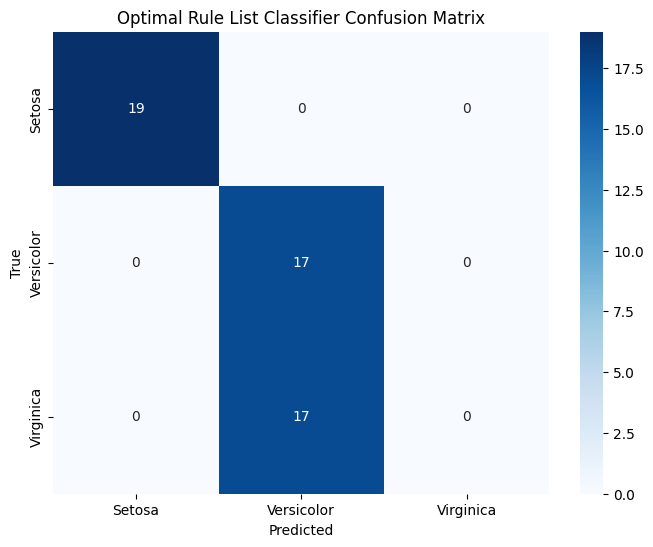

In [6]:
from imodels import OptimalRuleListClassifier

# Initialize the Optimal Rule List Classifier model
optimal_model = OptimalRuleListClassifier()

# Train the model on the training data
optimal_model.fit(X_train, y_train)

# Make predictions on the test data
optimal_preds = optimal_model.predict(X_test)

# Evaluate model performance
accuracy_optimal = np.mean(optimal_preds == y_test) * 100
precision_optimal = precision_score(y_test, optimal_preds, average='weighted')
recall_optimal = recall_score(y_test, optimal_preds, average='weighted')
f1_optimal = f1_score(y_test, optimal_preds, average='weighted')
confusion_optimal = confusion_matrix(y_test, optimal_preds)

# Print evaluation metrics
print("Optimal Rule List Classifier Metrics:")
print(f"Accuracy: {accuracy_optimal:.2f}%")
print(f"Precision: {precision_optimal:.2f}")
print(f"Recall: {recall_optimal:.2f}")
print(f"F1 Score: {f1_optimal:.2f}")

# Display confusion matrix
plot_confusion_matrix(confusion_optimal, "Optimal Rule List Classifier Confusion Matrix")

The Optimal Rule List Classifier also achieved an accuracy of 67.92%, similar to the Skope Rules model. It too struggled to separate closely related species like Versicolor and Virginica, which affected its precision and recall. The main advantage of this model is that it creates a short and optimal set of rules, which makes it very interpretable. However, its accuracy was not better than other models on this dataset.

### 3.2. Visual & Explanation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


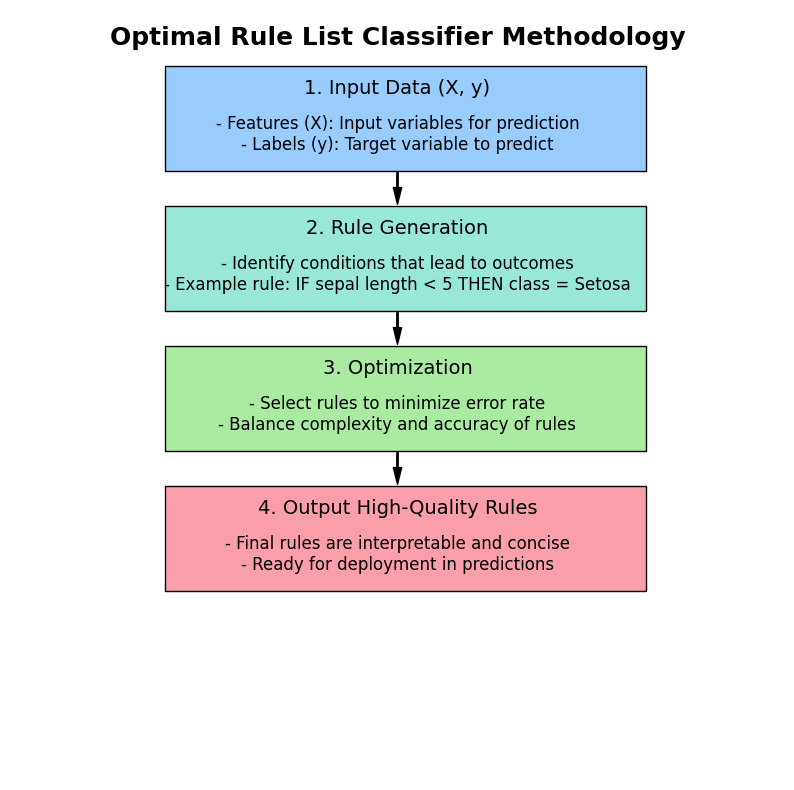

In [7]:
def plot_optimal_rule_list_methodology():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.text(0.5, 0.95, 'Optimal Rule List Classifier Methodology', fontsize=18, ha='center', weight='bold')

    # Input Data Box
    ax.add_patch(patches.Rectangle((0.2, 0.77), 0.62, 0.15, edgecolor='black', facecolor='#99CCFF'))
    ax.text(0.5, 0.88, '1. Input Data (X, y)', fontsize=14, ha='center')
    ax.text(0.5, 0.83, '- Features (X): Input variables for prediction', fontsize=12, ha='center')
    ax.text(0.5, 0.80, '- Labels (y): Target variable to predict', fontsize=12, ha='center')

    # Rule Generation Box
    ax.add_patch(patches.Rectangle((0.2, 0.57), 0.62, 0.15, edgecolor='black', facecolor='#99E8D7'))
    ax.text(0.5, 0.68, '2. Rule Generation', fontsize=14, ha='center')
    ax.text(0.5, 0.63, '- Identify conditions that lead to outcomes', fontsize=12, ha='center')
    ax.text(0.5, 0.60, '- Example rule: IF sepal length < 5 THEN class = Setosa', fontsize=12, ha='center')

    # Optimization Box
    ax.add_patch(patches.Rectangle((0.2, 0.37), 0.62, 0.15, edgecolor='black', facecolor='#A8EBA1'))
    ax.text(0.5, 0.48, '3. Optimization', fontsize=14, ha='center')
    ax.text(0.5, 0.43, '- Select rules to minimize error rate', fontsize=12, ha='center')
    ax.text(0.5, 0.40, '- Balance complexity and accuracy of rules', fontsize=12, ha='center')

    # Output High-Quality Rules Box
    ax.add_patch(patches.Rectangle((0.2, 0.17), 0.62, 0.15, edgecolor='black', facecolor='#F99EAA'))
    ax.text(0.5, 0.28, '4. Output High-Quality Rules', fontsize=14, ha='center')
    ax.text(0.5, 0.23, '- Final rules are interpretable and concise', fontsize=12, ha='center')
    ax.text(0.5, 0.20, '- Ready for deployment in predictions', fontsize=12, ha='center')

    # Arrow positions
    arrow_positions = [
        (0.5, 0.77),  # From Input Data to Rule Generation
        (0.5, 0.57),  # From Rule Generation to Optimization
        (0.5, 0.37)   # From Optimization to Output High-Quality Rules
    ]

    # Arrow ending positions
    arrow_end_positions = [
        (0.5, 0.72),  # End position for Input Data to Rule Generation
        (0.5, 0.52),  # End position for Rule Generation to Optimization
        (0.5, 0.32)   # End position for Optimization to Output High-Quality Rules
    ]

    for start, end in zip(arrow_positions, arrow_end_positions):
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.1, 1)
    ax.axis('off')
    plt.show()

# Visualization function call
plot_optimal_rule_list_methodology()

### **Explanation of the Methodology**   

a. **Input Data (X, y)**: We start by gathering the Iris dataset, which includes features like the length and width of the sepal and petal of different Iris flower species (X). The target labels (y) tell us which species each flower belongs to (e.g., Setosa, Versicolor, or Virginica).

b. **Rule Generation**: Using the Optimal Rule List algorithm, we create a set of rules that can classify the flowers. Each rule is a simple condition, like "IF sepal length is less than 5 cm, THEN the flower is likely Setosa."

c. **Optimization**: The rules generated are then optimized based on their performance. This means we choose the best rules that classify the most flowers correctly while minimizing mistakes. The goal is to find a small set of rules that perform well.

d. **Output High-Quality Rules**: Finally, we obtain a list of high-quality rules that are easy to understand. For example, a rule might be: "IF petal length is greater than 1.5 cm AND petal width is greater than 0.2 cm, THEN the flower is likely Versicolor."



---



## 4. Boosted Rules Classifier
### 4.1. Demo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Boosted Rules Classifier Metrics:
Accuracy: 88.68%
Precision: 0.92
Recall: 0.89
F1 Score: 0.88


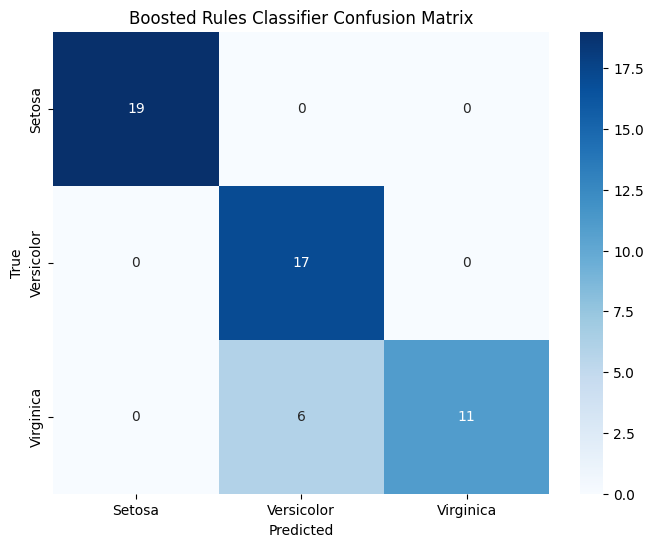

In [8]:
from imodels import BoostedRulesClassifier

# Initialize the Boosted Rules Classifier model
boosted_model = BoostedRulesClassifier()

# Train the model on the training data
boosted_model.fit(X_train, y_train)

# Make predictions on the test data
boosted_preds = boosted_model.predict(X_test)

# Evaluate model performance
accuracy_boosted = np.mean(boosted_preds == y_test) * 100
precision_boosted = precision_score(y_test, boosted_preds, average='weighted')
recall_boosted = recall_score(y_test, boosted_preds, average='weighted')
f1_boosted = f1_score(y_test, boosted_preds, average='weighted')
confusion_boosted = confusion_matrix(y_test, boosted_preds)

# Print evaluation metrics
print("Boosted Rules Classifier Metrics:")
print(f"Accuracy: {accuracy_boosted:.2f}%")
print(f"Precision: {precision_boosted:.2f}")
print(f"Recall: {recall_boosted:.2f}")
print(f"F1 Score: {f1_boosted:.2f}")

# Display confusion matrix
plot_confusion_matrix(confusion_boosted, "Boosted Rules Classifier Confusion Matrix")

The Boosted Rules Classifier performed relatively better than the other models, achieving an accuracy of 88.68%. The model seems to be more effective in correctly identifying species and minimizing false positives. Unlike the previous models, the Boosted Rules Classifier benefits from an ensemble of rules, which likely contributes to its improved accuracy and ability to generalize better to the data. Although it is slightly more complex, the increase in performance makes it a strong choice when both accuracy and interpretability are needed.

### 4.2. Visual & Explanation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


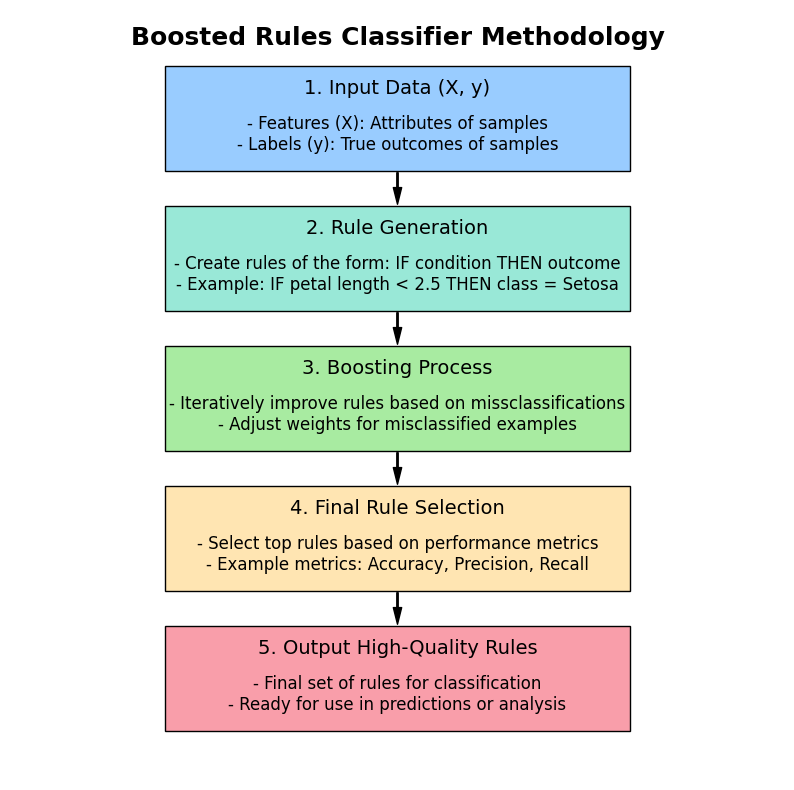

In [9]:
def plot_boosted_rules_classifier_methodology():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.text(0.5, 0.95, 'Boosted Rules Classifier Methodology', fontsize=18, ha='center', weight='bold')

    # Input Data Box
    ax.add_patch(patches.Rectangle((0.2, 0.77), 0.60, 0.15, edgecolor='black', facecolor='#99CCFF'))
    ax.text(0.5, 0.88, '1. Input Data (X, y)', fontsize=14, ha='center')
    ax.text(0.5, 0.83, '- Features (X): Attributes of samples', fontsize=12, ha='center')
    ax.text(0.5, 0.80, '- Labels (y): True outcomes of samples', fontsize=12, ha='center')

    # Rule Generation Box
    ax.add_patch(patches.Rectangle((0.2, 0.57), 0.60, 0.15, edgecolor='black', facecolor='#99E8D7'))
    ax.text(0.5, 0.68, '2. Rule Generation', fontsize=14, ha='center')
    ax.text(0.5, 0.63, '- Create rules of the form: IF condition THEN outcome', fontsize=12, ha='center')
    ax.text(0.5, 0.60, '- Example: IF petal length < 2.5 THEN class = Setosa', fontsize=12, ha='center')

    # Boosting Process Box
    ax.add_patch(patches.Rectangle((0.2, 0.37), 0.60, 0.15, edgecolor='black', facecolor='#A8EBA1'))
    ax.text(0.5, 0.48, '3. Boosting Process', fontsize=14, ha='center')
    ax.text(0.5, 0.43, '- Iteratively improve rules based on missclassifications', fontsize=12, ha='center')
    ax.text(0.5, 0.40, '- Adjust weights for misclassified examples', fontsize=12, ha='center')

    # Final Rule Selection Box
    ax.add_patch(patches.Rectangle((0.2, 0.17), 0.60, 0.15, edgecolor='black', facecolor='#FFE5B2'))
    ax.text(0.5, 0.28, '4. Final Rule Selection', fontsize=14, ha='center')
    ax.text(0.5, 0.23, '- Select top rules based on performance metrics', fontsize=12, ha='center')
    ax.text(0.5, 0.20, '- Example metrics: Accuracy, Precision, Recall', fontsize=12, ha='center')

    # Output High-Quality Rules Box
    ax.add_patch(patches.Rectangle((0.2, -0.03), 0.60, 0.15, edgecolor='black', facecolor='#F99EAA'))
    ax.text(0.5, 0.08, '5. Output High-Quality Rules', fontsize=14, ha='center')
    ax.text(0.5, 0.03, '- Final set of rules for classification', fontsize=12, ha='center')
    ax.text(0.5, 0.00, '- Ready for use in predictions or analysis', fontsize=12, ha='center')

    # Arrow positions
    arrow_positions = [
        (0.5, 0.77),  # From Input Data to Rule Generation
        (0.5, 0.57),  # From Rule Generation to Boosting Process
        (0.5, 0.37),  # From Boosting Process to Final Rule Selection
        (0.5, 0.17)   # From Final Rule Selection to Output High-Quality Rules
    ]

    # Arrow ending positions
    arrow_end_positions = [
        (0.5, 0.72),  # End position for Input Data to Rule Generation
        (0.5, 0.52),  # End position for Rule Generation to Boosting Process
        (0.5, 0.32),  # End position for Boosting Process to Final Rule Selection
        (0.5, 0.12)   # End position for Final Rule Selection to Output High-Quality Rules
    ]

    for start, end in zip(arrow_positions, arrow_end_positions):
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.1, 1)
    ax.axis('off')
    plt.show()

# Visualization function call
plot_boosted_rules_classifier_methodology()

### **Explanation of the Methodology**   

a. **Input Data (X, y)**: We start by gathering the Iris dataset, which includes features like the length and width of the sepal and petal of different Iris flower species (X). The target labels (y) tell us which species each flower belongs to (e.g., Setosa, Versicolor, or Virginica).

b. **Rule Generation**: The Boosted Rules Classifier generates rules using an ensemble approach. This means that multiple sets of rules are created, and each new set of rules focuses on correcting the mistakes made by the previous ones.

c. **Boosting Process**: In this stage, the classifier gives more weight to the examples that were misclassified in previous rounds. This process helps to improve accuracy by ensuring that the model learns from its mistakes.

d. **Final Rule Selection**: Once the boosting process is complete, the classifier selects the best-performing rules from all the generated rules. These rules form the final model that can be used to classify new observations.

e. **Output High-Quality Rules**: The output consists of a concise set of high-quality rules that are easy to interpret. For example, a rule might state: "IF petal length is greater than 1.5 cm AND petal width is greater than 0.2 cm, THEN the flower is likely Versicolor."